In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df = pd.read_csv("WorldCupMatches.csv")   
df.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [4]:
df.columns = (
    df.columns.str.strip()
              .str.replace(" ", "_")
              .str.replace("-", "_")
              .str.replace("(", "")
              .str.replace(")", "")
)

df.head()

def get_result(row):
    if row['Home_Team_Goals'] > row['Away_Team_Goals']:
        return "HomeWin"
    elif row['Home_Team_Goals'] < row['Away_Team_Goals']:
        return "AwayWin"
    else:
        return "Draw"

df['Result'] = df.apply(get_result, axis=1)

df['Result'].value_counts()



Result
HomeWin    488
Draw       190
AwayWin    174
Name: count, dtype: int64

In [6]:
cols_to_drop = [
    'Referee', 'Assistant_1', 'Assistant_2',
    'Win_condition', 'Stadium', 'City', 'Datetime'
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.head()


,Year,Stage,Home_Team_Name,Home_Team_Goals,Away_Team_Goals,Away_Team_Name,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,RoundID,MatchID,Home_Team_Initials,Away_Team_Initials,Result
0,1930,Group 1,France,4,1,Mexico,,4444.0,3,0,201,1096,FRA,MEX,HomeWin
1,1930,Group 4,USA,3,0,Belgium,,18346.0,2,0,201,1090,USA,BEL,HomeWin
2,1930,Group 2,Yugoslavia,2,1,Brazil,,24059.0,2,0,201,1093,YUG,BRA,HomeWin
3,1930,Group 3,Romania,3,1,Peru,,2549.0,1,0,201,1098,ROU,PER,HomeWin
4,1930,Group 1,Argentina,1,0,France,,23409.0,0,0,201,1085,ARG,FRA,HomeWin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Stage                 852 non-null    object 
 2   Home_Team_Name        852 non-null    object 
 3   Home_Team_Goals       852 non-null    int64  
 4   Away_Team_Goals       852 non-null    int64  
 5   Away_Team_Name        852 non-null    object 
 6   Win_conditions        852 non-null    object 
 7   Attendance            850 non-null    float64
 8   Half_time_Home_Goals  852 non-null    int64  
 9   Half_time_Away_Goals  852 non-null    int64  
 10  RoundID               852 non-null    int64  
 11  MatchID               852 non-null    int64  
 12  Home_Team_Initials    852 non-null    object 
 13  Away_Team_Initials    852 non-null    object 
 14  Result                852 non-null    object 
dtypes: float64(1), int64(7)

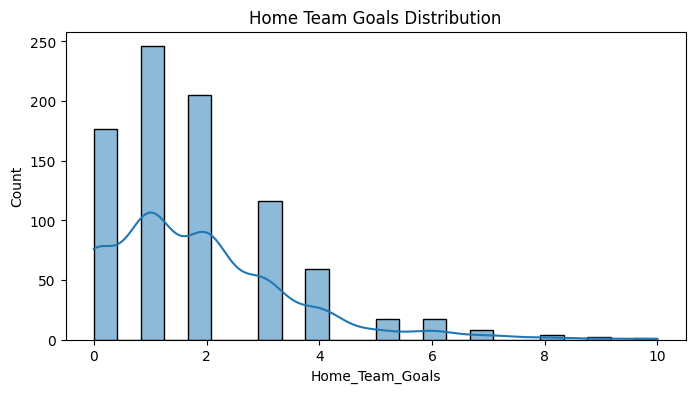

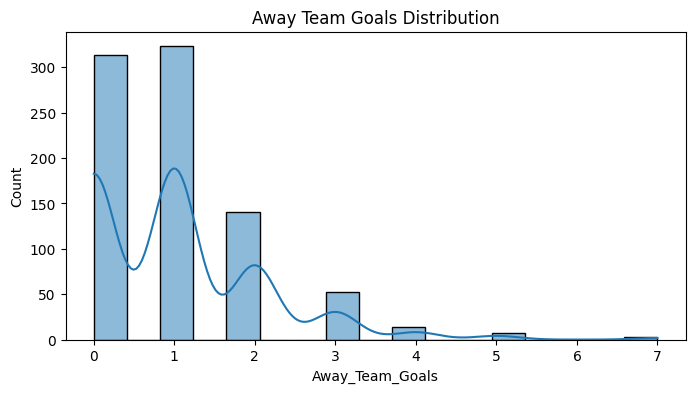

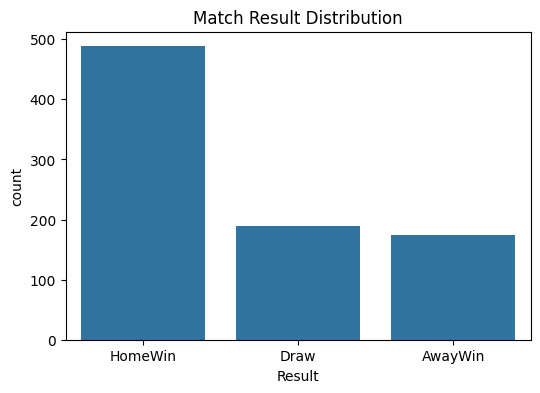

In [7]:
df.info()
df.describe()

plt.figure(figsize=(8,4))
sns.histplot(df['Home_Team_Goals'], kde=True)
plt.title("Home Team Goals Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Away_Team_Goals'], kde=True)
plt.title("Away Team Goals Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Result', data=df)
plt.title("Match Result Distribution")
plt.show()

In [10]:
df['Goal_Diff'] = df['Home_Team_Goals'] - df['Away_Team_Goals']
df['Total_Goals'] = df['Home_Team_Goals'] + df['Away_Team_Goals']
df['Is_Knockout'] = df['Stage'].apply(
    lambda x: 1 if ("Final" in x or "Knockout" in x) else 0
)

df.head()



,Year,Stage,Home_Team_Name,Home_Team_Goals,Away_Team_Goals,Away_Team_Name,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,RoundID,MatchID,Home_Team_Initials,Away_Team_Initials,Result,Goal_Diff,Total_Goals,Is_Knockout
0,1930,Group 1,France,4,1,Mexico,,4444.0,3,0,201,1096,FRA,MEX,HomeWin,3,5,0
1,1930,Group 4,USA,3,0,Belgium,,18346.0,2,0,201,1090,USA,BEL,HomeWin,3,3,0
2,1930,Group 2,Yugoslavia,2,1,Brazil,,24059.0,2,0,201,1093,YUG,BRA,HomeWin,1,3,0
3,1930,Group 3,Romania,3,1,Peru,,2549.0,1,0,201,1098,ROU,PER,HomeWin,2,4,0
4,1930,Group 1,Argentina,1,0,France,,23409.0,0,0,201,1085,ARG,FRA,HomeWin,1,1,0


In [16]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        'Home_Team_Name',
        'Away_Team_Name',
        'Stage',
        'Home_Team_Initials',
        'Away_Team_Initials'
    ],
    drop_first=True
)

df_encoded.head()

,Year,Home_Team_Goals,Away_Team_Goals,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,RoundID,MatchID,Result,Goal_Diff,Total_Goals,Is_Knockout,Home_Team_Name_Angola,Home_Team_Name_Argentina,Home_Team_Name_Australia,Home_Team_Name_Austria,Home_Team_Name_Belgium,Home_Team_Name_Bolivia,Home_Team_Name_Brazil,Home_Team_Name_Bulgaria,Home_Team_Name_Cameroon,Home_Team_Name_Canada,Home_Team_Name_Chile,Home_Team_Name_China PR,Home_Team_Name_Colombia,Home_Team_Name_Costa Rica,Home_Team_Name_Croatia,Home_Team_Name_Cuba,Home_Team_Name_Czech Republic,Home_Team_Name_Czechoslovakia,Home_Team_Name_C�te d'Ivoire,Home_Team_Name_Denmark,Home_Team_Name_Ecuador,Home_Team_Name_England,Home_Team_Name_France,Home_Team_Name_German DR,Home_Team_Name_Germany,Home_Team_Name_Germany FR,Home_Team_Name_Ghana,Home_Team_Name_Greece,Home_Team_Name_Haiti,Home_Team_Name_Honduras,Home_Team_Name_Hungary,Home_Team_Name_IR Iran,Home_Team_Name_Iran,Home_Team_Name_Iraq,Home_Team_Name_Italy,Home_Team_Name_Jamaica,Home_Team_Name_Japan,Home_Team_Name_Korea DPR,Home_Team_Name_Korea Republic,Home_Team_Name_Mexico,Home_Team_Name_Morocco,Home_Team_Name_Netherlands,Home_Team_Name_New Zealand,Home_Team_Name_Nigeria,Home_Team_Name_Northern Ireland,Home_Team_Name_Norway,Home_Team_Name_Paraguay,Home_Team_Name_Peru,Home_Team_Name_Poland,Home_Team_Name_Portugal,Home_Team_Name_Romania,Home_Team_Name_Russia,Home_Team_Name_Saudi Arabia,Home_Team_Name_Scotland,Home_Team_Name_Senegal,Home_Team_Name_Serbia,Home_Team_Name_Slovakia,Home_Team_Name_Slovenia,Home_Team_Name_South Africa,Home_Team_Name_Soviet Union,Home_Team_Name_Spain,Home_Team_Name_Sweden,Home_Team_Name_Switzerland,Home_Team_Name_Togo,Home_Team_Name_Tunisia,Home_Team_Name_Turkey,Home_Team_Name_USA,Home_Team_Name_Ukraine,Home_Team_Name_Uruguay,Home_Team_Name_Wales,Home_Team_Name_Yugoslavia,Home_Team_Name_Zaire,"Home_Team_Name_rn"">Bosnia and Herzegovina","Home_Team_Name_rn"">Republic of Ireland","Home_Team_Name_rn"">Serbia and Montenegro","Home_Team_Name_rn"">Trinidad and Tobago","Home_Team_Name_rn"">United Arab Emirates",Away_Team_Name_Angola,Away_Team_Name_Argentina,Away_Team_Name_Australia,Away_Team_Name_Austria,Away_Team_Name_Belgium,Away_Team_Name_Bolivia,Away_Team_Name_Brazil,Away_Team_Name_Bulgaria,Away_Team_Name_Cameroon,Away_Team_Name_Canada,Away_Team_Name_Chile,Away_Team_Name_China PR,Away_Team_Name_Colombia,Away_Team_Name_Costa Rica,Away_Team_Name_Croatia,Away_Team_Name_Cuba,Away_Team_Name_Czech Republic,Away_Team_Name_Czechoslovakia,Away_Team_Name_C�te d'Ivoire,Away_Team_Name_Denmark,Away_Team_Name_Dutch East Indies,Away_Team_Name_Ecuador,Away_Team_Name_Egypt,Away_Team_Name_El Salvador,Away_Team_Name_England,Away_Team_Name_France,Away_Team_Name_German DR,Away_Team_Name_Germany,Away_Team_Name_Germany FR,Away_Team_Name_Ghana,Away_Team_Name_Greece,Away_Team_Name_Haiti,Away_Team_Name_Honduras,Away_Team_Name_Hungary,Away_Team_Name_IR Iran,Away_Team_Name_Iran,Away_Team_Name_Iraq,Away_Team_Name_Israel,Away_Team_Name_Italy,Away_Team_Name_Jamaica,Away_Team_Name_Japan,Away_Team_Name_Korea DPR,Away_Team_Name_Korea Republic,Away_Team_Name_Kuwait,Away_Team_Name_Mexico,Away_Team_Name_Morocco,Away_Team_Name_Netherlands,Away_Team_Name_New Zealand,Away_Team_Name_Nigeria,Away_Team_Name_Northern Ireland,Away_Team_Name_Norway,Away_Team_Name_Paraguay,Away_Team_Name_Peru,Away_Team_Name_Poland,Away_Team_Name_Portugal,Away_Team_Name_Romania,Away_Team_Name_Russia,Away_Team_Name_Saudi Arabia,Away_Team_Name_Scotland,Away_Team_Name_Senegal,Away_Team_Name_Serbia,Away_Team_Name_Slovakia,Away_Team_Name_Slovenia,Away_Team_Name_South Africa,Away_Team_Name_Soviet Union,Away_Team_Name_Spain,Away_Team_Name_Sweden,Away_Team_Name_Switzerland,Away_Team_Name_Togo,Away_Team_Name_Tunisia,Away_Team_Name_Turkey,Away_Team_Name_USA,Away_Team_Name_Ukraine,Away_Team_Name_Uruguay,Away_Team_Name_Wales,Away_Team_Name_Yugoslavia,Away_Team_Name_Zaire,"Away_Team_Name_rn"">Bosnia and Herzegovina","Away_Team_Name_rn"">Republic of Ireland","Away_Team_

In [17]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Result'])
y = df_encoded['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   
)

X_train.shape, X_test.shape


((681, 350), (171, 350))

In [25]:
from sklearn.ensemble import RandomForestClassifier

if "Win_conditions" in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=["Win_conditions"])

X = df_encoded.drop(columns=['Result'])
y = df_encoded['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


,n_estimators,400
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


=== Classification Report ===
              precision    recall  f1-score   support

     AwayWin       1.00      1.00      1.00        35
        Draw       1.00      0.97      0.99        38
     HomeWin       0.99      1.00      0.99        98

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



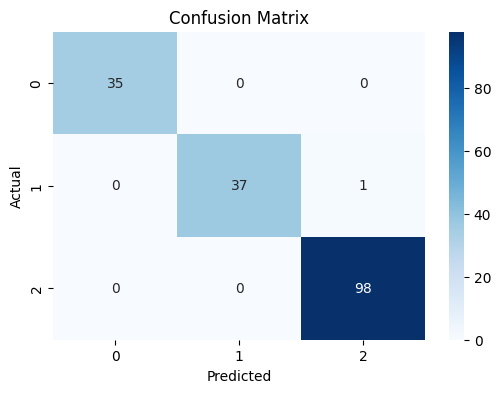

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



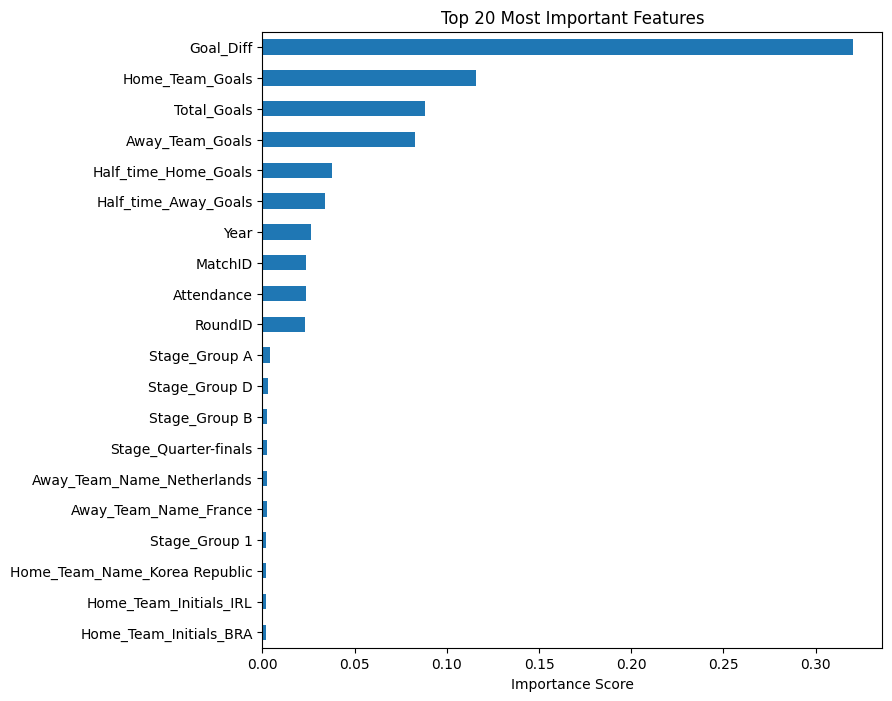

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
top20 = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 8))
top20.plot(kind='barh')
plt.title("Top 20 Most Important Features")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                
    scoring='f1_macro',  
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9977080749010573


In [30]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)

print("=== Best Model Classification Report ===")
print(classification_report(y_test, best_pred))


=== Best Model Classification Report ===
              precision    recall  f1-score   support

     AwayWin       1.00      1.00      1.00        35
        Draw       1.00      0.97      0.99        38
     HomeWin       0.99      1.00      0.99        98

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [31]:
best_prob = best_model.predict_proba(X_test)
prob_df = pd.DataFrame(
    best_prob,
    columns=best_model.classes_
)

prob_df.head(10)


,AwayWin,Draw,HomeWin
0,0.298268,0.433857,0.267875
1,0.001964,0.042500,0.955536
2,0.005833,0.056917,0.937250
3,0.013583,0.082708,0.903708
4,0.695905,0.232687,0.071409
5,0.063762,0.867292,0.068946
6,0.718724,0.234716,0.046560
7,0.929419,0.036208,0.034373
8,0.002833,0.114423,0.882744
9,0.878508,0.065292,0.056200


In [39]:
import joblib

joblib.dump(best_model, "worldcup_match_predictor.pkl")

print("Saved:", "worldcup_match_predictor.pkl")

loaded_model = joblib.load("worldcup_match_predictor.pkl")

loaded_preds = loaded_model.predict(X_test[:5])
loaded_preds

Saved: worldcup_match_predictor.pkl


array(['Draw', 'HomeWin', 'HomeWin', 'HomeWin', 'AwayWin'], dtype=object)

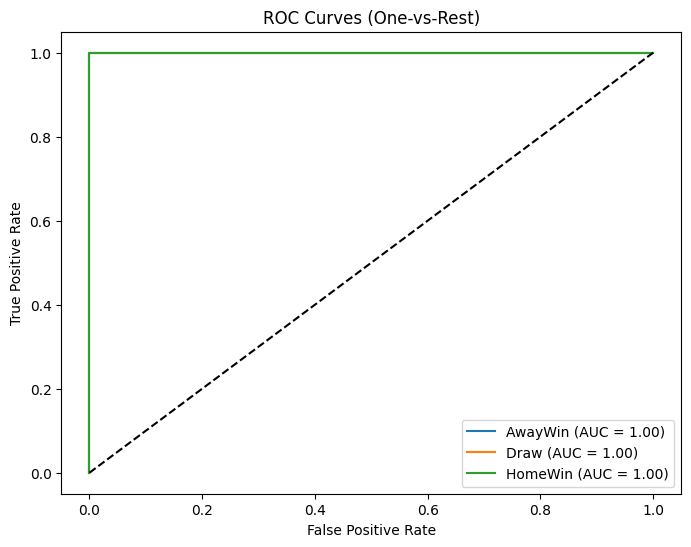

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

classes = best_model.classes_   # ['AwayWin', 'Draw', 'HomeWin']
y_test_binarized = label_binarize(y_test, classes=classes)

y_score = best_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.show()


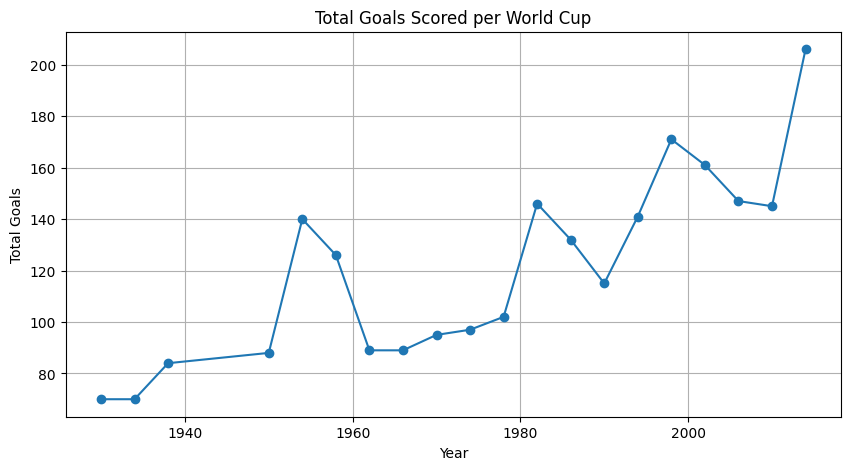

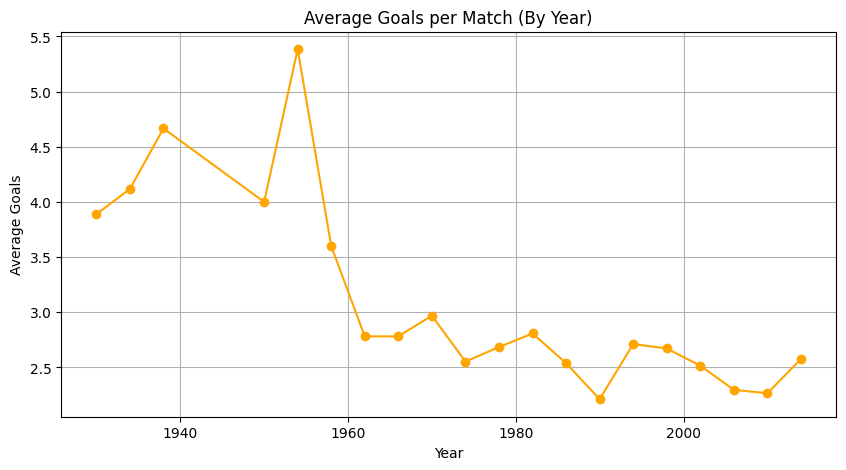

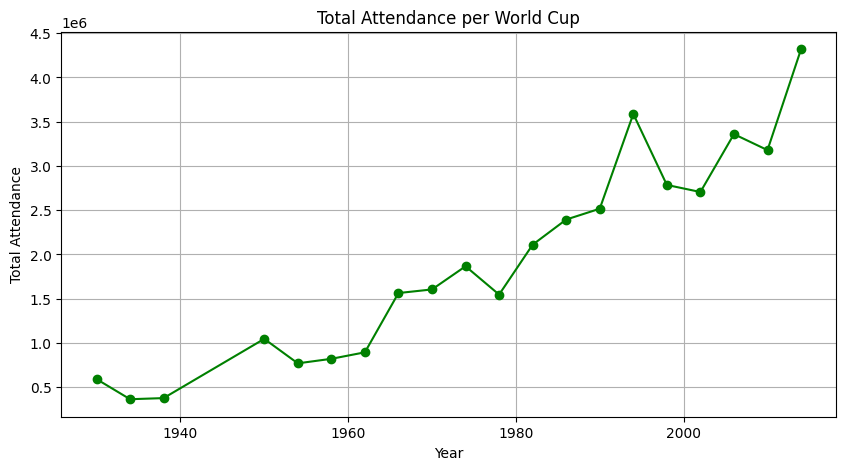

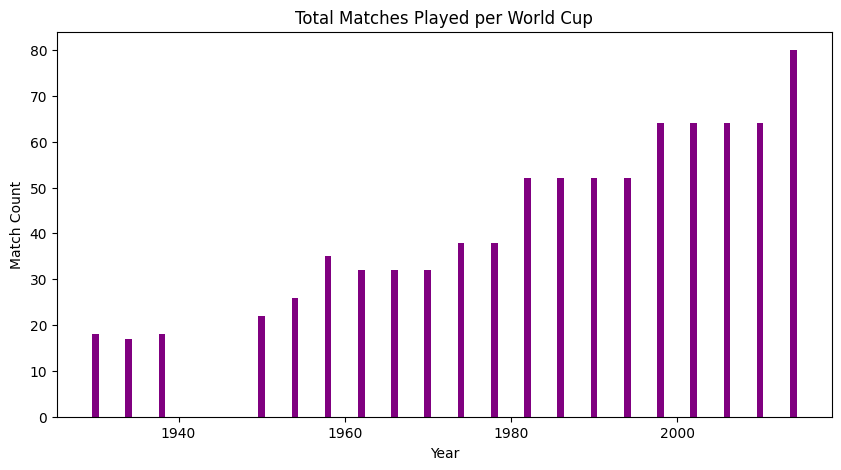

In [45]:

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

yearly = df.groupby('Year').agg({
    'Home_Team_Goals': 'sum',
    'Away_Team_Goals': 'sum',
    'Attendance': 'sum',
    'MatchID': 'count'
}).rename(columns={'MatchID': 'Match_Count'})

yearly['Total_Goals'] = yearly['Home_Team_Goals'] + yearly['Away_Team_Goals']

yearly

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly['Total_Goals'], marker='o')
plt.title("Total Goals Scored per World Cup")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
avg_goals = yearly['Total_Goals'] / yearly['Match_Count']
plt.plot(yearly.index, avg_goals, marker='o', color='orange')
plt.title("Average Goals per Match (By Year)")
plt.xlabel("Year")
plt.ylabel("Average Goals")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(yearly.index, yearly['Attendance'], marker='o', color='green')
plt.title("Total Attendance per World Cup")
plt.xlabel("Year")
plt.ylabel("Total Attendance")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(yearly.index, yearly['Match_Count'], color='purple')
plt.title("Total Matches Played per World Cup")
plt.xlabel("Year")
plt.ylabel("Match Count")
plt.show()


